In [69]:
 #importing libraries
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjusts the configuration of the plots we will create
#Read in the data
df=pd.read_csv('/Users/krishnathanmaitirupati/Documents/Portfolio projects/movies.csv')

In [57]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [39]:
missingcounts=df.isna().sum()
for column, count in missingcounts.items():
    print(f"column'{column}' has {count} values")

column'name' has 0 values
column'rating' has 77 values
column'genre' has 0 values
column'year' has 0 values
column'released' has 2 values
column'score' has 3 values
column'votes' has 3 values
column'director' has 0 values
column'writer' has 3 values
column'star' has 1 values
column'country' has 3 values
column'budget' has 2171 values
column'gross' has 189 values
column'company' has 17 values
column'runtime' has 4 values


In [40]:
# checking data types of columns
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
#changing data types of columns like budget and gross
# it is showing error of cannot change null values into datatype integer
# so first we are gonna HANDLE MISSING VALUES THEN WE WILL CHANGE DATA TYPE OF BUDGET AND GROSS COLUMN into int64 from float64
#HANDLING MISSING VALUES
df['budget']=df['budget'].fillna(0)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].fillna(0)
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].fillna(0)
df['votes']=df['votes'].astype('int64')


In [62]:
df=df.drop_duplicates()
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [63]:
# here we have change released column format June 13, 1980 (United States) to 1980-06-13
# we changed it to have our column released into little organised
df['released'] = df['released'].str.extract(r'(\w+\s\d+,\s\d+)')
df['released']= pd.to_datetime(df['released'], format='%B %d, %Y')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [64]:
# sorting DATAFRAME using sort function we use inplace to save changes to the original dataframe
df=df.sort_values(by=['gross'], ascending=False)


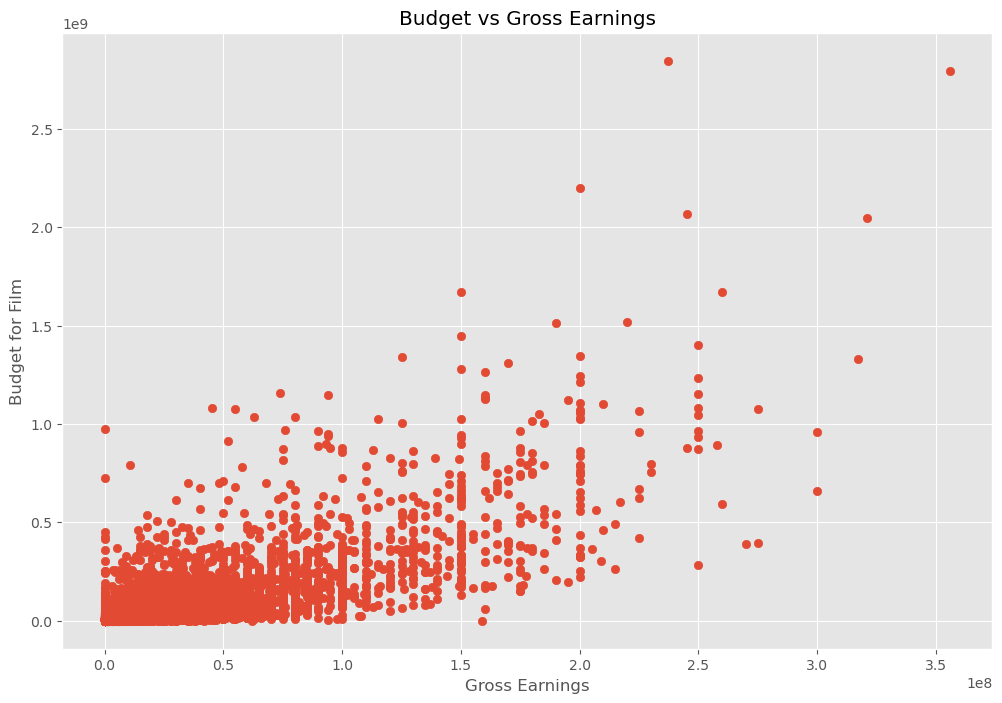

In [65]:
#lets compare variables to get a point of view
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()




<Axes: xlabel='budget', ylabel='gross'>

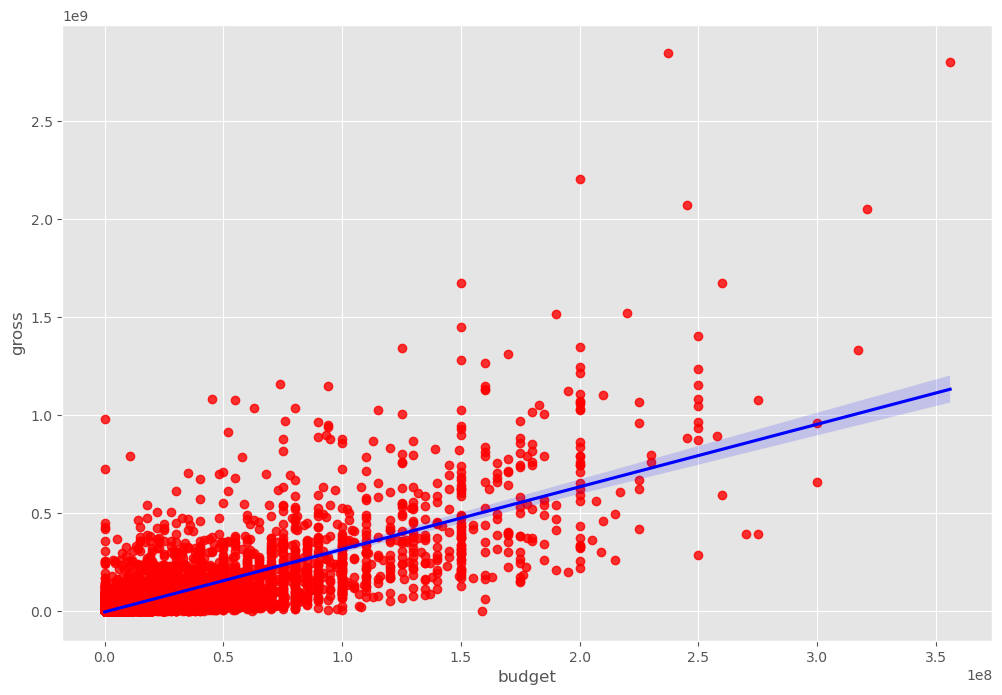

In [66]:
# we are going to plot budget vs gross using seaborn, scatter_kws is scatter keyword arguments, 
#line_kws is line keyword arguments
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [51]:
#correlation matrix
#numeric_only=True tells Pandas to calculate correlations only for numeric columns 
#And excludes non-numeric columns from the correlation matrix.
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

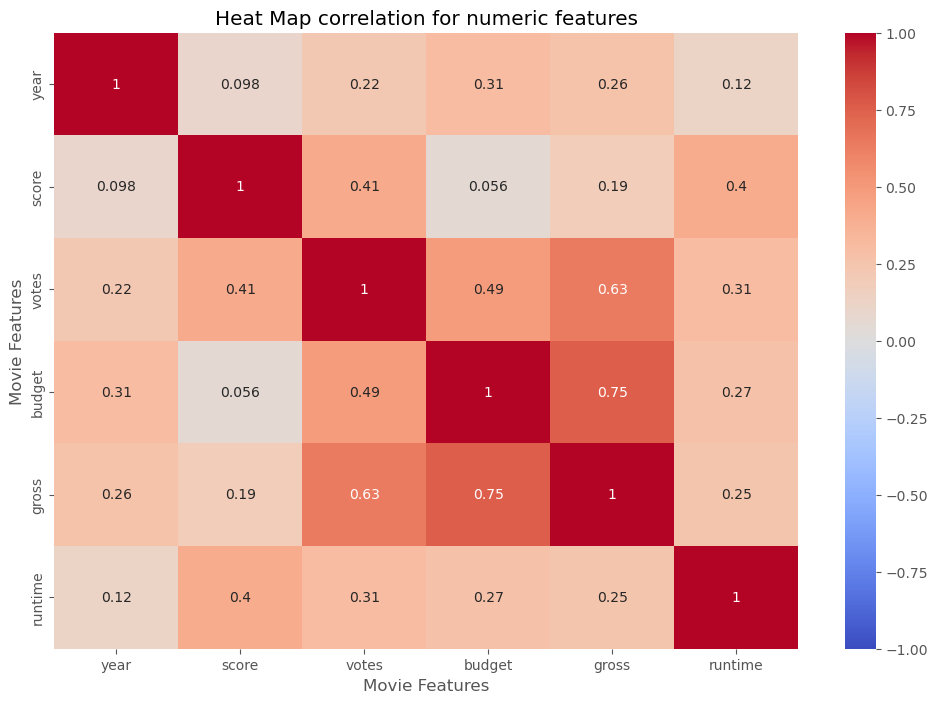

In [68]:
#here we can also adjust figure size using plt.figure(figsize=(8,6))
heat_map=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heat Map correlation for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [ ]:
#points to be taken
# Top 3 highest correlation observed between gross and budget(0.75), votes and gross(0.63), budget and votes(0.49)

In [70]:
#changing all columns into numeric
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized      

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


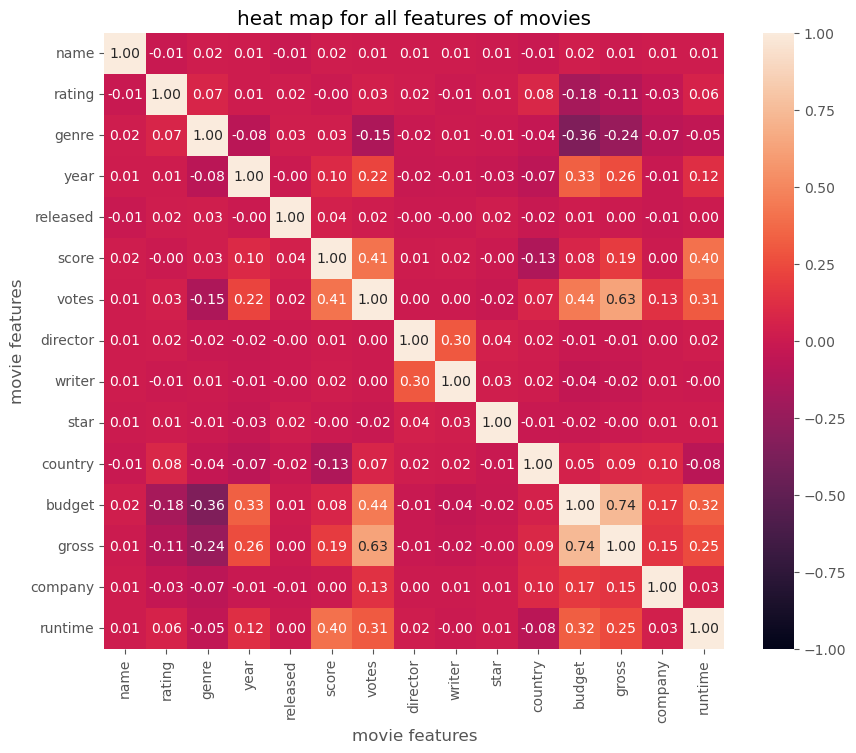

In [86]:
plt.figure(figsize=(10,8))
correlation_matrix=df_numerized.corr()
HeatMapForAllColumns=sns.heatmap(correlation_matrix, annot=True, fmt='.2f',vmin=-1, vmax=1)
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.title('heat map for all features of movies')
plt.show()


In [91]:
corr_pairs=df_numerized.corr().unstack()
sorted_pairs=corr_pairs.sort_values(ascending=False)
sorted_pairs




name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
votes     budget      0.442429
budget    votes       0.442429
score     votes       0.409182
votes     score       0.409182
score     runtime     0.399451
runtime   score       0.399451
year      budget      0.329321
budget    year        0.329321
          runtime     0.320447
runtime   budget      0.320447
          votes       0.309212
votes     runtime     0.309212
director  writer      0.299067
writer  

In [93]:
high_corr= sorted_pairs[(sorted_pairs)>0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
dtype: float64